# Setup

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import IPython
IPython.display.set_matplotlib_formats("svg")

# Persamaan difusi

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial t^2} + f(x,t)
$$

# Metode Eksplisit

In [93]:
Nx = 20
Nt = 40
T = 0.1
L = 1.0
α = 1.0
# spatial grid
x = np.linspace(0.0, L, Nx+1)
Δx = x[1] - x[0]
# time grid
t = np.linspace(0.0, T, Nt+1)
Δt = t[1] - t[0]
#
F = α * Δt / Δx**2
#
print("Δt = ", Δt)
print("Δx = ", Δx)
print("F  = ", F)
#
u = np.zeros( (Nx+1,Nt+1) )

Δt =  0.0025
Δx =  0.05
F  =  0.9999999999999998


In [15]:
def initial_cond(x):
    return np.sin(np.pi*x)

In [16]:
def analytic_sol(x,t):
    return np.sin(np.pi*x)*np.exp(-np.pi**2*t)

Syarat awal: $ u^{0}_{i} $

In [94]:
u[:,0] = initial_cond(x)

In [95]:
u[0,:] = 0.0
u[Nx,:] = 0.0

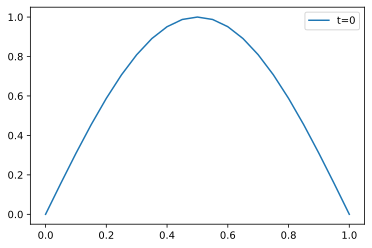

In [80]:
plt.clf()
plt.plot(x, u[:,0], label="t=0")
plt.legend();

In [96]:
for n in range(0,Nt):
    for i in range(1,Nx):
        u[i,n+1] = u[i,n] + F*( u[i+1,n] - 2*u[i,n] + u[i-1,n] )

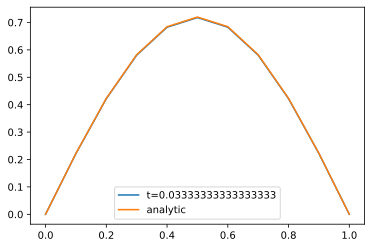

In [54]:
plt.clf()
#plt.plot(x, u[:,0], label="t="+str(t[0]))
plt.plot(x, u[:,10], label="t="+str(t[10]))
plt.plot(x, analytic_sol(x,t[10]), label="analytic")
plt.legend()

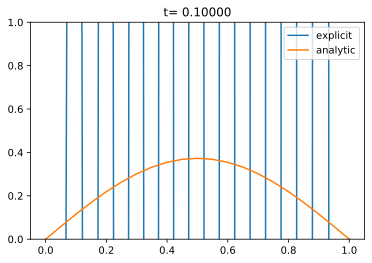

In [97]:
for n in range(0,Nt+1):
    plt.clf()
    plt.plot(x, u[:,n], label="explicit")
    plt.plot(x, analytic_sol(x,t[n]), label="analytic")
    plt.title("t= " + format("%.5f" % t[n]))     
    plt.legend()
    plt.ylim(0.0, 1.0)
    plt.savefig("IMG_sol_" + str(n) + ".png", dpi=150)

Tugas: metode eksplisit dan implisit untuk 2D diffusion eq:
(jangan pakai ADI)

$$
\frac{\partial u}{\partial t} = \nabla^2{u} + f(x,y,t)
$$